In [1]:
#installing packages
!pip install numpy
!pip install pandas
!pip install scikit-learn
!pip install matplotlib
!pip install tabulate
!pip install seaborn
!pip install graphviz

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.7/15.7 MB 56.5 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.3/11.3 MB 75.9 MB/s eta 0:00:0000:010:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.8/24.8 MB 52.8 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 298.0/298.0 kB 37.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.1/38.1 MB 34.2 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.2/11.2 MB 81.0 MB/s eta 0:00:0000:010:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 66.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/3.2 MB 81.1 MB/s eta 0:00:00:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 965.4/965.4 kB 53.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 288.2/288.2 kB 6.5 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.0/47.0 kB 2.4 MB/s eta 0:00:00


In [1]:
#import packages
import numpy as np
import pandas as pd
from sklearn.preprocessing import OneHotEncoder as SklearnOneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor 
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score,mean_absolute_percentage_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.preprocessing import MinMaxScaler
import datetime
from datetime import date
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import precision_score, \
    recall_score, confusion_matrix, classification_report, \
    accuracy_score, f1_score
from datetime import timedelta, date
from sklearn.metrics import mean_squared_error
import sklearn
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from tabulate import tabulate
from sklearn.metrics import precision_score, \
    recall_score, confusion_matrix, classification_report, \
    accuracy_score, f1_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import export_graphviz 
from matplotlib import pyplot as plt
from sklearn import tree
import zipfile
import seaborn as sns
import os
import gc
gc.collect()

0

In [2]:
#Defining Assining_Variables()
def Assining_Variables():
    fle1 = "6M-0K-99K.users.dataset.public.csv"
    fle2 = "Buyers-repartition-by-country.csv"
    fle3 = "Comparison-of-Sellers-by-Gender-and-Country.csv"
    fle4 = "Countries-with-Top-Sellers-(Fashion-C2C).csv"
    return fle1,fle2,fle3,fle4

In [3]:
#Defining load_dataset()
def load_dataset(fle1,fle2,fle3,fle4):
    df_air_visit_data = pd.read_csv(fle1)
    df_air_reserve = pd.read_csv(fle2)
    df_air_store_info = pd.read_csv(fle3)
    df_date_info = pd.read_csv(fle4)  
    return df_air_visit_data,df_air_reserve,df_air_store_info,df_date_info

In [4]:
 #Defining Counting_NAN_Values()
def Counting_NAN_Values(dfff):
        df_nan = pd.DataFrame(columns=['Nan count'])
        nan_col = list(dfff.columns.tolist())
        total_nan = 0
        for col in nan_col:
            nan_cnt = dfff[col].isnull().sum()
            df_nan.loc[col] = nan_cnt
            total_nan += nan_cnt
        print(tabulate(df_nan, headers = 'keys', tablefmt = 'psql'))
        return df_nan['Nan count']

In [5]:
#Defining Dataset_Cleaning()
def Dataset_Cleaning(dff):
        dfff = dff.isna().sum().sum()
        print("Total NAN values are : {0}".format(dfff))
        dff_nan = dff[pd.isnull(dff).any(axis=1)]
        print("Data with at least 1 NAN values: {0}".format(len(dff_nan.index)))
        df_nan_all = dff[pd.isnull(dff).all(1)]
        print("Rows filled NAN data: {0}".format(len(df_nan_all.index)))
        df_air_store = dff.identifierHash.isnull().sum()
        #df_hpg_store = dff.hpg_store_id.isnull().sum()
        print("Count of NAN values on identifierHash are: {0}".format(df_air_store))
        #print("Count of NAN values on hpg_store_id are: {0}".format(df_hpg_store))
        nan_ids_df = dff[dff.identifierHash.isnull()]
        len_invalid_id = len(nan_ids_df.index)
        print("Number of Invalid IDs (identifierhash) are : {0}".format(len_invalid_id))
        df_nadn = Counting_NAN_Values(dff)
        return dfff,df_nadn

In [6]:
#Defining Nan_Percent_Computation()
def Nan_Percent_Computation(dffff):
        nan_values_cnt,df_nafn = Dataset_Cleaning(dffff)
        total_values_cnt = dffff.shape[0]*dffff.shape[1]
        print("Total Values' Counts are : {0}".format(total_values_cnt))
        total_correct_values_cnt = (total_values_cnt - nan_values_cnt)
        print("Total Correct Values' Counts are : {0}".format(total_correct_values_cnt))
        return total_correct_values_cnt,nan_values_cnt,df_nafn

In [7]:
#Defining Pie_Chart_NAN_Column_Plotting()
def Pie_Chart_NAN_Column_Plotting(dft_val1,dfg,total_crt_value_cnt,nan_value_cnt):
    dft = pd.DataFrame({'Data': ['Correct Values', 'NAN Values'],
                          'ValueCount': [total_crt_value_cnt,nan_value_cnt]})
        # Plotting the pie chart for above dataframe
    #dft.groupby(['Data']).sum().plot(kind='pie', y='Value Count', autopct='%1.0f%%')
    # Data to plot
    lab1 = dft.Data.values
    sdd = dft.ValueCount.values
    #sizes = [215, 130,215, 130,215, 130]
    color = ['lightcoral', 'lightskyblue']
    explode1 = (0.1, 0)  # explode 1st slice
    # Plot
    plt.pie(sdd, explode=explode1, labels=lab1, colors=color,autopct='%1.1f%%', shadow=True, startangle=140)
    plt.axis('equal')
    plt.show()
   

In [8]:
#Defining Final_Dataset()
def Final_Dataset():
        fle1,fle2,fle3,fle4 = Assining_Variables()
        df_air_visit_data,df_air_reserve,df_air_store_info,df_date_info = load_dataset(fle1,fle2,fle3,fle4)
        #df_air_visit_data,df_air_reserve,df_air_store_info,df_date_info,df_store_id_relation,df_hpg_reserve,df_hpg_store_info = self.load_dataset()
        h1,t1 = os.path.split(fle1)
        h2,t2 = os.path.split(fle2)
        h3,t3 = os.path.split(fle3)
        h4,t4 = os.path.split(fle4)
        print("The shape of {0} is {1}".format(t1,df_air_visit_data.shape),end="\n")
        print("The shape of {0} is {1}".format(t2,df_air_reserve.shape),end="\n")
        print("The shape of {0} is {1}".format(t3,df_air_store_info.shape),end="\n")
        print("The shape of {0} is {1}".format(t4,df_date_info.shape),end="\n")
        """df_air_visit_data = df_air_visit_data.reset_index()
        df_air_reserve = df_air_reserve.reset_index()
        df_air_store_info = df_air_store_info.reset_index()
        df_date_info = df_date_info.reset_index()"""
        #df_n = pd.concat([df_air_visit_data['country'],df_date_info], axis=1, join="outer")
        df_n = pd.merge(df_air_visit_data,df_date_info,on='country',how="outer")
        #df_nn = pd.concat([df_air_reserve,df_air_store_info], axis=1, join="outer")
        df_nn = pd.merge(df_air_reserve,df_air_store_info,on='country',how="outer")
        df = pd.concat([df_n,df_nn], axis=0, join="outer")
        #df = pd.merge(df_n,df_nn,on='country',how="outer")
        #print(df_n)
        print(df)
        print(df_n.shape)
        print(df_nn.shape)
        print(df.shape)
        return df

In [9]:
#Calling Final_Dataset()
df = Final_Dataset()

The shape of 6M-0K-99K.users.dataset.public.csv is (98913, 24)
The shape of Buyers-repartition-by-country.csv is (62, 32)
The shape of Comparison-of-Sellers-by-Gender-and-Country.csv is (73, 19)
The shape of Countries-with-Top-Sellers-(Fashion-C2C).csv is (19, 26)
    identifierHash  type        country language  socialNbFollowers  \
0    -7.279641e+18  user     Etats-Unis       en                3.0   
1    -6.727673e+18  user     Etats-Unis       en                3.0   
2     2.543720e+18  user     Etats-Unis       en                3.0   
3     6.412145e+18  user     Etats-Unis       en                3.0   
4     6.359422e+18  user     Etats-Unis       en                3.0   
..             ...   ...            ...      ...                ...   
89             NaN   NaN     Martinique      NaN                NaN   
90             NaN   NaN  Îles Canaries      NaN                NaN   
91             NaN   NaN            NaN      NaN                NaN   
92             NaN   NaN 

In [10]:
df.dtypes

identifierHash       float64
type                  object
country               object
language              object
socialNbFollowers    float64
                      ...   
meanfollowers_y      float64
meanfollows          float64
percentofappusers    float64
percentofiosusers    float64
meanseniority        float64
Length: 89, dtype: object

In [11]:
total_crt_value_cnt,nan_value_cnt,df_najn = Nan_Percent_Computation(df)

Total NAN values are : 4355794
Data with at least 1 NAN values: 99007
Rows filled NAN data: 0
Count of NAN values on identifierHash are: 94
Number of Invalid IDs (identifierhash) are : 94
+---------------------------+-------------+
|                           |   Nan count |
|---------------------------+-------------|
| identifierHash            |          94 |
| type                      |          94 |
| country                   |           3 |
| language                  |          94 |
| socialNbFollowers         |          94 |
| socialNbFollows           |          94 |
| socialProductsLiked       |          94 |
| productsListed            |          94 |
| productsSold              |          94 |
| productsPassRate          |          94 |
| productsWished            |          94 |
| productsBought            |          94 |
| gender                    |          94 |
| civilityGenderId          |          94 |
| civilityTitle             |          94 |
| hasAnyApp         

In [12]:
def EDA(df,total_crt_value_cnt):
    print("Are e-commerce users interested in social network feature?")
    df1 = df.apply(lambda row: row[df['type'].isin(['user'])])
    #df2 = df.apply(lambda row: row[~df['type'].isin(['user'])])
    df_tot = df1[['socialProductsLiked','socialNbFollowers','socialNbFollows']].shape[0]*df1[['socialProductsLiked','socialNbFollowers','socialNbFollows']].shape[1]
    #df_totn = df2[['socialProductsLiked','socialNbFollowers','socialNbFollows']].shape[0]*df2[['socialProductsLiked','socialNbFollowers','socialNbFollows']].shape[1]
    #nan_interested = df[['socialProductsLiked','socialNbFollowers','socialNbFollows']].isna().sum().sum()
    #nan_interested1 = len(nan_interested.index)
    #print(df_tot)
    #print(total_crt_value_cnt)
    Not_liked = ((df_tot/total_crt_value_cnt)*100)
    liked = 100 - Not_liked
    dft = pd.DataFrame({'Data': ['Interested Users', 'Not Interested Users'],
                          'ValueCount': [liked,Not_liked]})
    # Data to plot
    lab1 = dft.Data.values
    sdd = dft.ValueCount.values
    color = ['lightcoral', 'lightskyblue']
    #explode1 = (0.1, 0)  # explode 1st slice
    # Plot
    fig5, ax5 = plt.subplots()
    ax5.pie(sdd, labels=lab1, colors=color,autopct='%1.1f%%', shadow=True, startangle=140)
    ax5.axis('equal')
    plt.show(fig5)
        
    print("Are my users active enough?")
    df1 = df.apply(lambda row: row[df['type'].isin(['user'])])
    #df2 = df.apply(lambda row: row[~df['type'].isin(['user'])])
    #df_tote = df1[['productsSold','productsBought']].shape[0]*df1[['productsSold','productsBought']].shape[1]
    df_tote = df1[['socialProductsLiked','productsWished','productsSold','productsListed','productsBought','totalproductssold','totalproductsbought','totalbought','totalwished','totalproductslisted','totalproductswished','buyers']].shape[0]*df1[['socialProductsLiked','productsWished','productsListed','productsSold','productsBought','totalbought','totalwished','totalproductslisted','totalproductswished','buyers']].shape[1]
    
    #df_totn = df2[['productsSold','productsBought']].shape[0]*df2[['productsSold','productsBought']].shape[1]
    #nan_interest = df[['productsSold','productsBought']].isna().sum().sum()
    #nan_interest1 = len(nan_interest)
    #print(df_tote)
    #print(total_crt_value_cnt)
    Not_active = ((df_tote/total_crt_value_cnt)*100)
    active = 100 - Not_active
    dft = pd.DataFrame({'Data': ['active Users', 'Not active Users'],
                          'ValueCount': [active,Not_active]})
    # Data to plot
    lab1 = dft.Data.values
    sdd = dft.ValueCount.values
    color = ['lightcoral', 'lightskyblue']
    #explode1 = (0.1, 0)  # explode 1st slice
    # Plot
    fig6, ax6 = plt.subplots()
    ax6.pie(sdd, labels=lab1, colors=color,autopct='%1.1f%%', shadow=True, startangle=140)
    ax6.axis('equal')
    plt.show(fig6)
    
    print("How likely are people from other countries to sign up in a C2C website?")
    df1 = df.apply(lambda row: row[df['type'].isin(['user'])])
    #print(df11)
    #df2 = df.apply(lambda row: row[~df['type'].isin(['user'])])
    #df_tote = df1[['productsSold','productsBought']].shape[0]*df1[['productsSold','productsBought']].shape[1]
    df_totee = df1[['socialProductsLiked','productsWished','productsSold','productsListed','productsBought','country']].shape[0]*df1[['socialProductsLiked','productsWished','productsSold','productsListed','productsBought','country']].shape[1]
    
    #df_totn = df2[['productsSold','productsBought']].shape[0]*df2[['productsSold','productsBought']].shape[1]
    #nan_interest = df[['productsSold','productsBought']].isna().sum().sum()
    #nan_interest1 = len(nan_interest)
    #print(df_tote)
    #print(total_crt_value_cnt)
    Not_likely_Users = ((df_totee/total_crt_value_cnt)*100)
    likely_Users = 100 - Not_likely_Users
    dft = pd.DataFrame({'Data': ['likely Users', 'Not likely Users'],
                          'ValueCount': [likely_Users,Not_likely_Users]})
    # Data to plot
    lab1 = dft.Data.values
    sdd = dft.ValueCount.values
    color = ['lightcoral', 'lightskyblue']
    #explode1 = (0.1, 0)  # explode 1st slice
    # Plot
    fig7, ax7 = plt.subplots()
    ax7.pie(sdd, labels=lab1, colors=color,autopct='%1.1f%%', shadow=True, startangle=140)
    ax7.axis('equal')
    plt.show(fig7)
    
    print("How many users are likely to drop off after years using my service?")
    df1 = df.apply(lambda row: row[df['type'].isin(['user'])])
    #print(df11)
    #df2 = df.apply(lambda row: row[~df['type'].isin(['user'])])
    #df_tote = df1[['productsSold','productsBought']].shape[0]*df1[['productsSold','productsBought']].shape[1]
    #meanofflinedays = [int(df1['meanofflinedays'].values[i]/365.0) for i in range(0,len(df1['meanofflinedays']))] 
    #df2 = pd.DataFrame({'seniorityAsYears':meanofflinedays})
    
    df_totwee = df1[['socialProductsLiked','productsWished','productsSold','productsListed','productsBought','seniorityAsYears']].shape[0]*df1[['socialProductsLiked','productsWished','productsSold','productsListed','productsBought','seniorityAsYears']].shape[1]
    
    #df_totn = df2[['productsSold','productsBought']].shape[0]*df2[['productsSold','productsBought']].shape[1]
    #nan_interest = df[['productsSold','productsBought']].isna().sum().sum()
    #nan_interest1 = len(nan_interest)
    #print(df_tote)
    #print(total_crt_value_cnt)
    Not_Dropped_Users = ((df_totwee/total_crt_value_cnt)*100)
    Dropped_Users = 100 - Not_Dropped_Users
    dft = pd.DataFrame({'Data': ['Dropped Users', 'Not Dropped Users'],
                          'ValueCount': [Dropped_Users,Not_Dropped_Users]})
    # Data to plot
    lab1 = dft.Data.values
    sdd = dft.ValueCount.values
    color = ['lightcoral', 'lightskyblue']
    #explode1 = (0.1, 0)  # explode 1st slice
    # Plot
    fig8, ax8 = plt.subplots()
    ax8.pie(sdd, labels=lab1, colors=color,autopct='%1.1f%%', shadow=True, startangle=140)
    ax8.axis('equal')
    plt.show(fig8)

Are e-commerce users interested in social network feature?


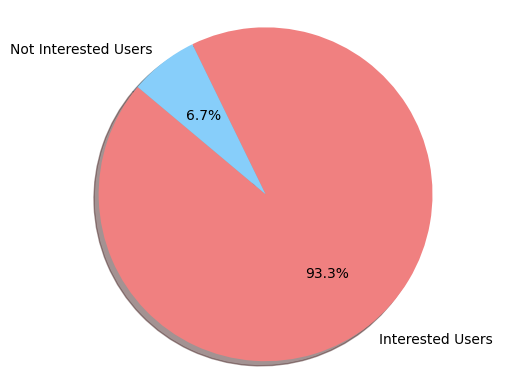

Are my users active enough?


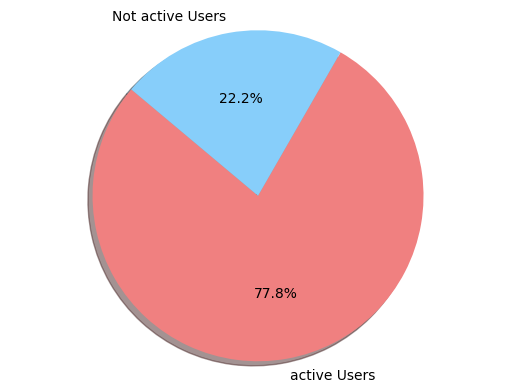

How likely are people from other countries to sign up in a C2C website?


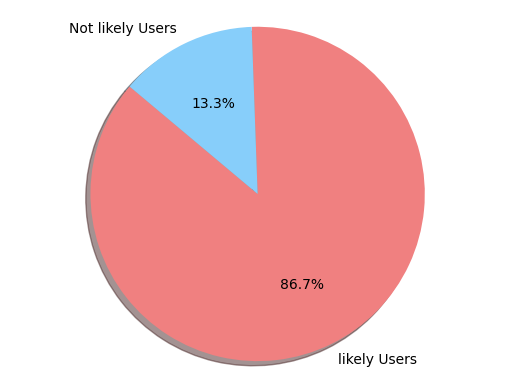

How many users are likely to drop off after years using my service?


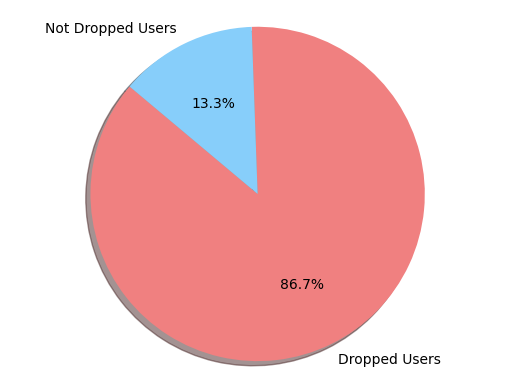

In [13]:
EDA(df,total_crt_value_cnt)

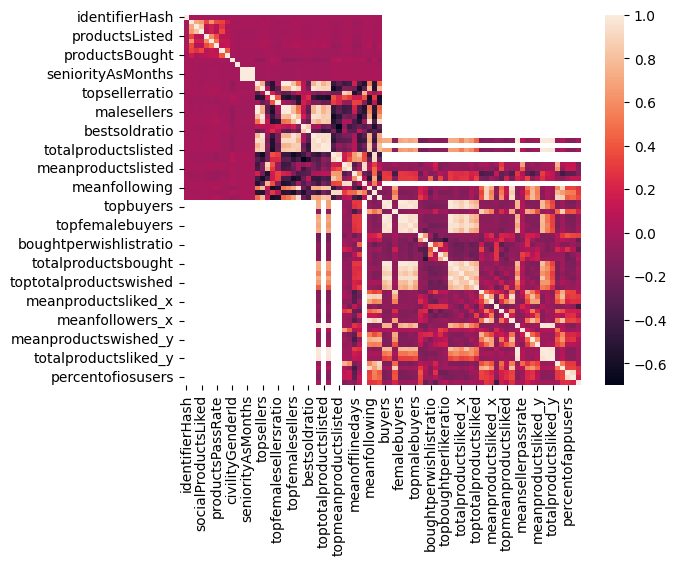

In [14]:
fig1, ax1 = plt.subplots()
sns.heatmap(df.corr(), ax=ax1)
plt.show(fig1)

In [15]:
duplicate = df[df.duplicated()]
 
print("Duplicate Rows :")
 
# Print the resultant Dataframe
duplicate

Duplicate Rows :


,identifierHash,type,country,language,socialNbFollowers,socialNbFollows,socialProductsLiked,productsListed,productsSold,productsPassRate,...,meanproductswished_y,meanproductsliked_y,totalbought,totalwished,totalproductsliked_y,meanfollowers_y,meanfollows,percentofappusers,percentofiosusers,meanseniority


<AxesSubplot:>

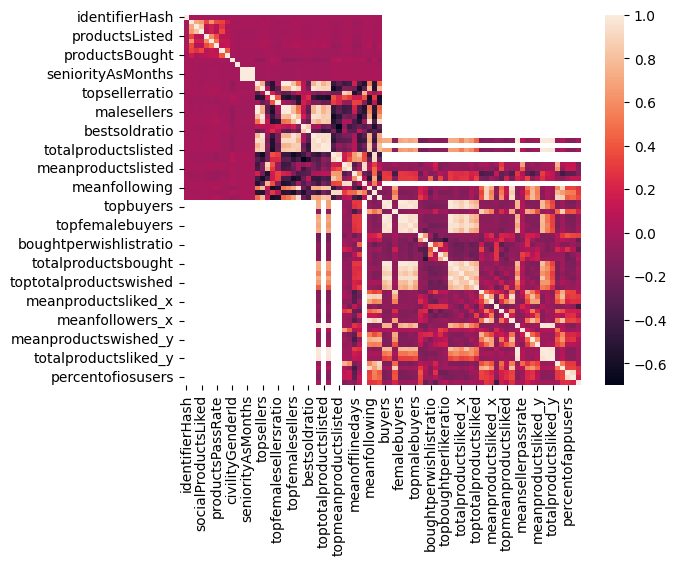

In [16]:
sns.heatmap(df.corr())

<AxesSubplot:>

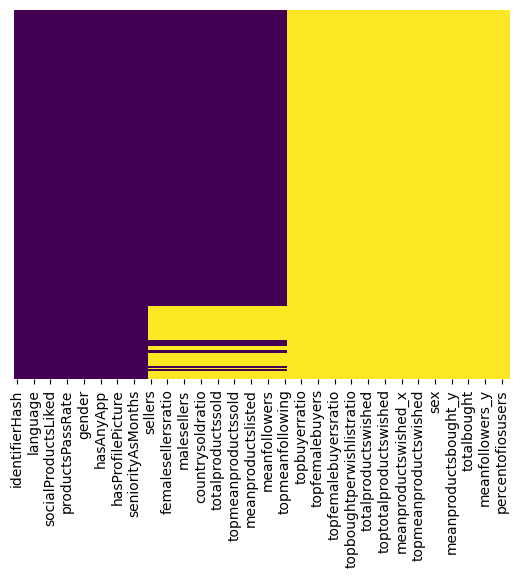

In [17]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

Total NAN values are : 4355794
Data with at least 1 NAN values: 99007
Rows filled NAN data: 0
Count of NAN values on identifierHash are: 94
Number of Invalid IDs (identifierhash) are : 94
+---------------------------+-------------+
|                           |   Nan count |
|---------------------------+-------------|
| identifierHash            |          94 |
| type                      |          94 |
| country                   |           3 |
| language                  |          94 |
| socialNbFollowers         |          94 |
| socialNbFollows           |          94 |
| socialProductsLiked       |          94 |
| productsListed            |          94 |
| productsSold              |          94 |
| productsPassRate          |          94 |
| productsWished            |          94 |
| productsBought            |          94 |
| gender                    |          94 |
| civilityGenderId          |          94 |
| civilityTitle             |          94 |
| hasAnyApp         

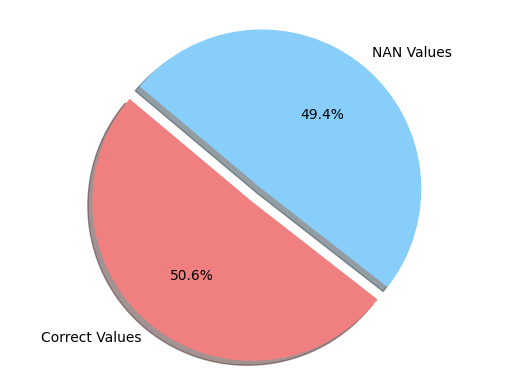

+---------------------------+------------------+
|                           |   % of NAN Count |
|---------------------------+------------------|
| identifierHash            |       0.0949428  |
| type                      |       0.0949428  |
| country                   |       0.00303009 |
| language                  |       0.0949428  |
| socialNbFollowers         |       0.0949428  |
| socialNbFollows           |       0.0949428  |
| socialProductsLiked       |       0.0949428  |
| productsListed            |       0.0949428  |
| productsSold              |       0.0949428  |
| productsPassRate          |       0.0949428  |
| productsWished            |       0.0949428  |
| productsBought            |       0.0949428  |
| gender                    |       0.0949428  |
| civilityGenderId          |       0.0949428  |
| civilityTitle             |       0.0949428  |
| hasAnyApp                 |       0.0949428  |
| hasAndroidApp             |       0.0949428  |
| hasIosApp         

In [18]:
#Printing the number of NANs in each column
total_crt_value_cnt,nan_value_cnt,df_najn = Nan_Percent_Computation(df)
df_nan_disp = pd.DataFrame()

#Printing the PieChart -> number of NANs
Pie_Chart_NAN_Column_Plotting(df_najn,df,total_crt_value_cnt,nan_value_cnt)
n_rows = len(df)
for i in range(0,len(df_najn)):
    nan_percent_in_each_col = ((df_najn/n_rows)*100)
    df_nan_disp = pd.DataFrame({'% of NAN Count':nan_percent_in_each_col})
print(tabulate(df_nan_disp, headers = 'keys', tablefmt = 'psql'))

In [19]:
df.drop(['buyers','topbuyers','topbuyerratio','femalebuyers','malebuyers','topfemalebuyers','topmalebuyers','femalebuyersratio','topfemalebuyersratio','boughtperwishlistratio','boughtperlikeratio','topboughtperwishlistratio','topboughtperlikeratio','totalproductsbought','totalproductswished','totalproductsliked_x','toptotalproductsbought','toptotalproductswished','toptotalproductsliked','meanproductsbought_x','meanproductswished_x','meanproductsliked_x','topmeanproductsbought','topmeanproductswished','topmeanproductsliked','meanfollowers_x','sex','nbsellers','meansellerpassrate','meanproductsbought_y','meanproductswished_y','meanproductsliked_y','totalbought','totalwished','totalproductsliked_y','meanfollowers_y','meanfollows','percentofappusers','percentofiosusers','meanseniority','identifierHash'],axis=1,inplace=True)
df.dropna(subset=['productsBought'],inplace=True)

In [20]:
#Getting the median count
print(df.sellers.median())
print(df.topsellers.median())
print(df.topsellerratio.median())
print(df.femalesellersratio.median())
print(df.topfemalesellersratio.median())
print(df.femalesellers.median())
print(df.malesellers.median())
print(df.topfemalesellers.median())
print(df.topmalesellers.median())
print(df.countrysoldratio.median())
print(df.bestsoldratio.median())
print(df.toptotalproductssold.median())
print(df.totalproductssold.median())
print(df.toptotalproductslisted.median())
print(df.totalproductslisted.median())
print(df.topmeanproductssold.median())
print(df.topmeanproductslisted.median())
print(df.meanproductssold.median())
print(df.meanproductslisted.median())
print(df.meanofflinedays.median())
print(df.topmeanofflinedays.median())
print(df.meanfollowers.median())
print(df.meanfollowing.median())
print(df.topmeanfollowers.median())
print(df.topmeanfollowing.median())

289.0
21.0
4.0
77.8
80.0
232.0
57.0
18.0
3.0
1.59
1.4
972.0
1806.0
449.0
927.0
46.285714285714285
31.68
6.249134948096885
3.207612456747405
227.1
36.6
10.7
14.6
53.2
17.2


In [21]:
#Replacing the Nan values w.r.t. their median values for each.
df['sellers'] = df['sellers'].replace(np.nan,289.0,inplace=True)
df['topsellers'] = df['topsellers'].replace(np.nan,21.0,inplace=True)
df['topsellerratio'] = df['topsellerratio'].replace(np.nan,4.0,inplace=True)
df['femalesellersratio'] = df['femalesellersratio'].replace(np.nan,77.8,inplace=True)
df['topfemalesellersratio'] = df['topfemalesellersratio'].replace(np.nan,80.0,inplace=True)
df['femalesellers'] = df['femalesellers'].replace(np.nan,232.0,inplace=True)
df['malesellers'] = df['malesellers'].replace(np.nan,57.0,inplace=True)
df['topfemalesellers'] = df['topfemalesellers'].replace(np.nan,18.0,inplace=True)
df['topmalesellers'] = df['topmalesellers'].replace(np.nan,3.0,inplace=True)
df['countrysoldratio'] = df['countrysoldratio'].replace(np.nan,1.59,inplace=True)
df['bestsoldratio'] = df['bestsoldratio'].replace(np.nan,1.4,inplace=True)
df['toptotalproductssold'] = df['toptotalproductssold'].replace(np.nan,972.0,inplace=True)
df['totalproductssold'] = df['totalproductssold'].replace(np.nan,1806.0,inplace=True)
df['toptotalproductslisted'] = df['toptotalproductslisted'].replace(np.nan,449.0,inplace=True)
df['totalproductslisted'] = df['totalproductslisted'].replace(np.nan,927.0,inplace=True)
df['topmeanproductssold'] = df['topmeanproductslisted'].replace(np.nan,46.285714285714285,inplace=True)
df['topmeanproductslisted'] = df['topmeanproductslisted'].replace(np.nan,31.68,inplace=True)
df['meanproductssold'] = df['meanproductssold'].replace(np.nan,6.249134948096885,inplace=True)
df['meanproductslisted'] = df['meanproductslisted'].replace(np.nan,3.207612456747405,inplace=True)
df['meanofflinedays'] = df['meanofflinedays'].replace(np.nan,227.1,inplace=True)
df['topmeanofflinedays'] = df['topmeanofflinedays'].replace(np.nan,36.6,inplace=True)
df['meanfollowers'] = df['meanfollowers'].replace(np.nan,10.7,inplace=True)
df['meanfollowing'] = df['meanfollowing'].replace(np.nan,14.6,inplace=True)
df['topmeanfollowers'] = df['topmeanfollowers'].replace(np.nan,53.2,inplace=True)
df['topmeanfollowing'] = df['topmeanfollowing'].replace(np.nan,17.2,inplace=True)

In [22]:
#Displaying the Nan count finally
df_nadbjn = Counting_NAN_Values(df)

+------------------------+-------------+
|                        |   Nan count |
|------------------------+-------------|
| type                   |           0 |
| country                |           0 |
| language               |           0 |
| socialNbFollowers      |           0 |
| socialNbFollows        |           0 |
| socialProductsLiked    |           0 |
| productsListed         |           0 |
| productsSold           |           0 |
| productsPassRate       |           0 |
| productsWished         |           0 |
| productsBought         |           0 |
| gender                 |           0 |
| civilityGenderId       |           0 |
| civilityTitle          |           0 |
| hasAnyApp              |           0 |
| hasAndroidApp          |           0 |
| hasIosApp              |           0 |
| hasProfilePicture      |           0 |
| daysSinceLastLogin     |           0 |
| seniority              |           0 |
| seniorityAsMonths      |           0 |
| seniorityAsYea

In [23]:
df

,type,country,language,socialNbFollowers,socialNbFollows,socialProductsLiked,productsListed,productsSold,productsPassRate,productsWished,...,topmeanproductssold,topmeanproductslisted,meanproductssold,meanproductslisted,meanofflinedays,topmeanofflinedays,meanfollowers,meanfollowing,topmeanfollowers,topmeanfollowing
0,user,Etats-Unis,en,3.0,8.0,0.0,0.0,0.0,0.0,0.0,...,None,None,None,None,None,None,None,None,None,None
1,user,Etats-Unis,en,3.0,8.0,0.0,0.0,0.0,0.0,0.0,...,None,None,None,None,None,None,None,None,None,None
2,user,Etats-Unis,en,3.0,8.0,0.0,0.0,0.0,0.0,0.0,...,None,None,None,None,None,None,None,None,None,None
3,user,Etats-Unis,en,3.0,8.0,0.0,0.0,0.0,0.0,0.0,...,None,None,None,None,None,None,None,None,None,None
4,user,Etats-Unis,en,3.0,8.0,0.0,0.0,0.0,0.0,0.0,...,None,None,None,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98908,user,Samoa,en,3.0,8.0,0.0,0.0,0.0,0.0,0.0,...,None,None,None,None,None,None,None,None,None,None
98909,user,Mayotte,fr,3.0,8.0,0.0,0.0,0.0,0.0,0.0,...,None,None,None,None,None,None,None,None,None,None
98910,user,Saint Kitts et Nevis,en,3.0,8.0,0.0,0.0,0.0,0.0,0.0,...,None,None,None,None,None,None,None,None,None,None
98911,user,Swaziland,fr,3.0,8.0,0.0,0.0,0.0,0.0,0.0,...,None,None,None,None,None,None,None,None,None,None


In [24]:
from sklearn.preprocessing import LabelEncoder

#create instance of label encoder
lab = LabelEncoder()
#Transforming the categorical values to integer readable format for models.
#df['identifierHash'] = lab.fit_transform(df['identifierHash'])
df['type'] = lab.fit_transform(df['type'])
df['country'] = lab.fit_transform(df['country'])
df['language'] = lab.fit_transform(df['language'])
df['civilityTitle'] = lab.fit_transform(df['civilityTitle'])
df['hasAnyApp'] = lab.fit_transform(df['hasAnyApp'])
df['hasAndroidApp'] = lab.fit_transform(df['hasAndroidApp'])
df['hasIosApp'] = lab.fit_transform(df['hasIosApp'])
df['hasAndroidApp'] = lab.fit_transform(df['hasAndroidApp'])
df['hasProfilePicture'] = lab.fit_transform(df['hasProfilePicture'])
df['countryCode'] = lab.fit_transform(df['countryCode'])
df['gender'] = lab.fit_transform(df['gender'])

#Displaying the Dataframe
df

,type,country,language,socialNbFollowers,socialNbFollows,socialProductsLiked,productsListed,productsSold,productsPassRate,productsWished,...,topmeanproductssold,topmeanproductslisted,meanproductssold,meanproductslisted,meanofflinedays,topmeanofflinedays,meanfollowers,meanfollowing,topmeanfollowers,topmeanfollowing
0,0,55,1,3.0,8.0,0.0,0.0,0.0,0.0,0.0,...,None,None,None,None,None,None,None,None,None,None
1,0,55,1,3.0,8.0,0.0,0.0,0.0,0.0,0.0,...,None,None,None,None,None,None,None,None,None,None
2,0,55,1,3.0,8.0,0.0,0.0,0.0,0.0,0.0,...,None,None,None,None,None,None,None,None,None,None
3,0,55,1,3.0,8.0,0.0,0.0,0.0,0.0,0.0,...,None,None,None,None,None,None,None,None,None,None
4,0,55,1,3.0,8.0,0.0,0.0,0.0,0.0,0.0,...,None,None,None,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98908,0,155,1,3.0,8.0,0.0,0.0,0.0,0.0,0.0,...,None,None,None,None,None,None,None,None,None,None
98909,0,116,3,3.0,8.0,0.0,0.0,0.0,0.0,0.0,...,None,None,None,None,None,None,None,None,None,None
98910,0,152,1,3.0,8.0,0.0,0.0,0.0,0.0,0.0,...,None,None,None,None,None,None,None,None,None,None
98911,0,167,3,3.0,8.0,0.0,0.0,0.0,0.0,0.0,...,None,None,None,None,None,None,None,None,None,None


In [25]:
df.sellers

0        None
1        None
2        None
3        None
4        None
         ... 
98908    None
98909    None
98910    None
98911    None
98912    None
Name: sellers, Length: 98913, dtype: object

In [26]:
df = df.select_dtypes(exclude=['object'])

In [27]:
df.shape

(98913, 23)

In [28]:
df.to_csv('final1.csv')

In [29]:
df.dtypes

type                     int64
country                  int64
language                 int64
socialNbFollowers      float64
socialNbFollows        float64
socialProductsLiked    float64
productsListed         float64
productsSold           float64
productsPassRate       float64
productsWished         float64
productsBought         float64
gender                   int64
civilityGenderId       float64
civilityTitle            int64
hasAnyApp                int64
hasAndroidApp            int64
hasIosApp                int64
hasProfilePicture        int64
daysSinceLastLogin     float64
seniority              float64
seniorityAsMonths      float64
seniorityAsYears       float64
countryCode              int64
dtype: object

In [30]:
df

,type,country,language,socialNbFollowers,socialNbFollows,socialProductsLiked,productsListed,productsSold,productsPassRate,productsWished,...,civilityTitle,hasAnyApp,hasAndroidApp,hasIosApp,hasProfilePicture,daysSinceLastLogin,seniority,seniorityAsMonths,seniorityAsYears,countryCode
0,0,55,1,3.0,8.0,0.0,0.0,0.0,0.0,0.0,...,2,0,0,0,1,709.0,3205.0,106.83,8.90,185
1,0,55,1,3.0,8.0,0.0,0.0,0.0,0.0,0.0,...,2,0,0,0,1,709.0,3205.0,106.83,8.90,185
2,0,55,1,3.0,8.0,0.0,0.0,0.0,0.0,0.0,...,2,0,0,0,1,709.0,3205.0,106.83,8.90,185
3,0,55,1,3.0,8.0,0.0,0.0,0.0,0.0,0.0,...,2,0,0,0,1,709.0,3205.0,106.83,8.90,185
4,0,55,1,3.0,8.0,0.0,0.0,0.0,0.0,0.0,...,2,0,0,0,1,558.0,3205.0,106.83,8.90,185
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98908,0,155,1,3.0,8.0,0.0,0.0,0.0,0.0,0.0,...,2,0,0,0,1,694.0,2855.0,95.17,7.93,194
98909,0,116,3,3.0,8.0,0.0,0.0,0.0,0.0,0.0,...,2,0,0,0,1,518.0,2854.0,95.13,7.93,195
98910,0,152,1,3.0,8.0,0.0,0.0,0.0,0.0,0.0,...,2,0,0,0,1,692.0,2853.0,95.10,7.92,103
98911,0,167,3,3.0,8.0,0.0,0.0,0.0,0.0,0.0,...,2,0,0,0,1,691.0,2852.0,95.07,7.92,171


In [31]:
print(df.shape)

(98913, 23)


In [32]:
df

,type,country,language,socialNbFollowers,socialNbFollows,socialProductsLiked,productsListed,productsSold,productsPassRate,productsWished,...,civilityTitle,hasAnyApp,hasAndroidApp,hasIosApp,hasProfilePicture,daysSinceLastLogin,seniority,seniorityAsMonths,seniorityAsYears,countryCode
0,0,55,1,3.0,8.0,0.0,0.0,0.0,0.0,0.0,...,2,0,0,0,1,709.0,3205.0,106.83,8.90,185
1,0,55,1,3.0,8.0,0.0,0.0,0.0,0.0,0.0,...,2,0,0,0,1,709.0,3205.0,106.83,8.90,185
2,0,55,1,3.0,8.0,0.0,0.0,0.0,0.0,0.0,...,2,0,0,0,1,709.0,3205.0,106.83,8.90,185
3,0,55,1,3.0,8.0,0.0,0.0,0.0,0.0,0.0,...,2,0,0,0,1,709.0,3205.0,106.83,8.90,185
4,0,55,1,3.0,8.0,0.0,0.0,0.0,0.0,0.0,...,2,0,0,0,1,558.0,3205.0,106.83,8.90,185
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98908,0,155,1,3.0,8.0,0.0,0.0,0.0,0.0,0.0,...,2,0,0,0,1,694.0,2855.0,95.17,7.93,194
98909,0,116,3,3.0,8.0,0.0,0.0,0.0,0.0,0.0,...,2,0,0,0,1,518.0,2854.0,95.13,7.93,195
98910,0,152,1,3.0,8.0,0.0,0.0,0.0,0.0,0.0,...,2,0,0,0,1,692.0,2853.0,95.10,7.92,103
98911,0,167,3,3.0,8.0,0.0,0.0,0.0,0.0,0.0,...,2,0,0,0,1,691.0,2852.0,95.07,7.92,171


In [34]:
from sklearn.feature_selection import VarianceThreshold
def Feature_selection(df):
    var_thres=VarianceThreshold(threshold=0)
    var_thres.fit_transform(df)
    print("Printing the True/False Values for Constant Features Only")
    print(var_thres.get_support())
    constant_columns = [column for column in df.columns if column not in df.columns[var_thres.get_support()]]
    df.drop(constant_columns,axis=1, inplace=True)
    return df

df = Feature_selection(df)

Printing the True/False Values for Constant Features Only
[False  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True]


/srv/conda/envs/notebook/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [35]:
X = df.drop("productsBought",axis=1)
y = df['productsBought']

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [37]:
X_train.shape

(79130, 21)

In [38]:
X_train.corr()

,country,language,socialNbFollowers,socialNbFollows,socialProductsLiked,productsListed,productsSold,productsPassRate,productsWished,gender,...,civilityTitle,hasAnyApp,hasAndroidApp,hasIosApp,hasProfilePicture,daysSinceLastLogin,seniority,seniorityAsMonths,seniorityAsYears,countryCode
country,1.000000,0.016514,0.010144,0.000774,0.002245,0.009767,0.014346,0.020073,0.008231,-0.008588,...,-0.000900,0.026148,-0.020997,0.039760,-0.006810,0.002929,-0.011842,-0.011842,-0.011854,0.152414
language,0.016514,1.000000,0.011726,0.008644,0.002817,0.018862,0.021710,0.042306,-0.009703,0.040940,...,-0.036187,0.043047,0.101925,-0.006549,-0.029774,-0.003389,-0.003411,-0.003414,-0.003317,-0.230180
socialNbFollowers,0.010144,0.011726,1.000000,0.738708,0.686373,0.346659,0.616238,0.334989,0.349613,-0.006384,...,-0.006031,0.083997,0.027876,0.079274,-0.278546,-0.005223,0.007067,0.007063,0.007072,-0.006941
socialNbFollows,0.000774,0.008644,0.738708,1.000000,0.816248,0.106934,0.190867,0.059767,0.279888,-0.001735,...,0.001615,0.012018,0.001725,0.012141,-0.044826,-0.000650,0.004612,0.004612,0.004632,-0.001250
socialProductsLiked,0.002245,0.002817,0.686373,0.816248,1.000000,0.049194,0.199171,0.059003,0.354814,-0.004457,...,0.002508,0.025369,0.005691,0.024851,-0.064666,-0.001643,-0.000046,-0.000046,-0.000016,-0.001986
productsListed,0.009767,0.018862,0.346659,0.106934,0.049194,1.000000,0.621664,0.368310,0.066530,-0.005465,...,-0.006848,0.039189,0.009386,0.039081,-0.135074,-0.003583,0.000792,0.000793,0.000771,-0.002387
productsSold,0.014346,0.021710,0.616238,0.190867,0.199171,0.621664,1.000000,0.512492,0.136922,-0.000526,...,-0.011470,0.059039,0.018099,0.056698,-0.177035,-0.004312,0.005208,0.005208,0.005226,-0.007380
productsPassRate,0.020073,0.042306,0.334989,0.059767,0.059003,0.368310,0.512492,1.000000,0.087352,-0.000251,...,-0.020830,0.088877,0.029710,0.085030,-0.263441,-0.006998,0.003342,0.003341,0.003353,-0.016097
productsWished,0.008231,-0.009703,0.349613,0.279888,0.354814,0.066530,0.136922,0.087352,1.000000,-0.010135,...,0.007488,0.045105,0.024423,0.039278,-0.102632,-0.004189,-0.004005,-0.004004,-0.003995,-0.007144
gender,-0.008588,0.040940,-0.006384,-0.001735,-0.004457,-0.005465,-0.000526,-0.000251,-0.010135,1.000000,...,-0.953663,0.090538,0.045389,0.074843,-0.006573,0.003295,0.005231,0.005231,0.005208,-0.060871


In [39]:
X_test.corr()

,country,language,socialNbFollowers,socialNbFollows,socialProductsLiked,productsListed,productsSold,productsPassRate,productsWished,gender,...,civilityTitle,hasAnyApp,hasAndroidApp,hasIosApp,hasProfilePicture,daysSinceLastLogin,seniority,seniorityAsMonths,seniorityAsYears,countryCode
country,1.000000,0.019605,0.015719,0.003295,-0.001249,0.013583,0.016183,0.012328,0.008291,-0.002911,...,-0.005164,0.012635,-0.028619,0.028502,-0.011823,-0.010218,-0.017370,-0.017365,-0.017448,0.159025
language,0.019605,1.000000,0.023104,0.026429,-0.016234,0.025117,0.024018,0.032898,0.002647,0.039513,...,-0.036375,0.052434,0.103373,0.002631,-0.029426,-0.005516,-0.000932,-0.000942,-0.000765,-0.225190
socialNbFollowers,0.015719,0.023104,1.000000,0.426000,0.226120,0.387433,0.725571,0.468465,0.202593,-0.013648,...,-0.002294,0.120953,0.025899,0.117183,-0.349029,-0.009103,0.000380,0.000365,0.000322,-0.013099
socialNbFollows,0.003295,0.026429,0.426000,1.000000,0.101943,0.091614,0.269111,0.148043,0.095301,-0.009911,...,0.008835,0.040847,0.003101,0.042682,-0.130403,-0.003208,0.002262,0.002256,0.002202,-0.002480
socialProductsLiked,-0.001249,-0.016234,0.226120,0.101943,1.000000,0.054874,0.067723,0.120814,0.370337,-0.016881,...,0.011787,0.078593,0.022787,0.075739,-0.113760,-0.006409,-0.016572,-0.016572,-0.016643,-0.004624
productsListed,0.013583,0.025117,0.387433,0.091614,0.054874,1.000000,0.506061,0.349128,0.078305,-0.003327,...,-0.001124,0.038402,0.002750,0.039380,-0.151857,-0.004490,-0.013649,-0.013652,-0.013690,-0.010085
productsSold,0.016183,0.024018,0.725571,0.269111,0.067723,0.506061,1.000000,0.520987,0.077746,-0.003567,...,-0.005239,0.066432,0.005864,0.067855,-0.190181,-0.005832,-0.005788,-0.005792,-0.005784,-0.010915
productsPassRate,0.012328,0.032898,0.468465,0.148043,0.120814,0.349128,0.520987,1.000000,0.119767,-0.010901,...,0.002698,0.106015,0.031696,0.099287,-0.282004,-0.009288,-0.006412,-0.006419,-0.006371,-0.024047
productsWished,0.008291,0.002647,0.202593,0.095301,0.370337,0.078305,0.077746,0.119767,1.000000,-0.010406,...,-0.006195,0.066123,0.042782,0.052677,-0.117144,-0.007148,-0.004630,-0.004631,-0.004617,-0.012297
gender,-0.002911,0.039513,-0.013648,-0.009911,-0.016881,-0.003327,-0.003567,-0.010901,-0.010406,1.000000,...,-0.949611,0.080024,0.042867,0.063637,0.001426,0.014201,-0.008341,-0.008339,-0.008310,-0.065967


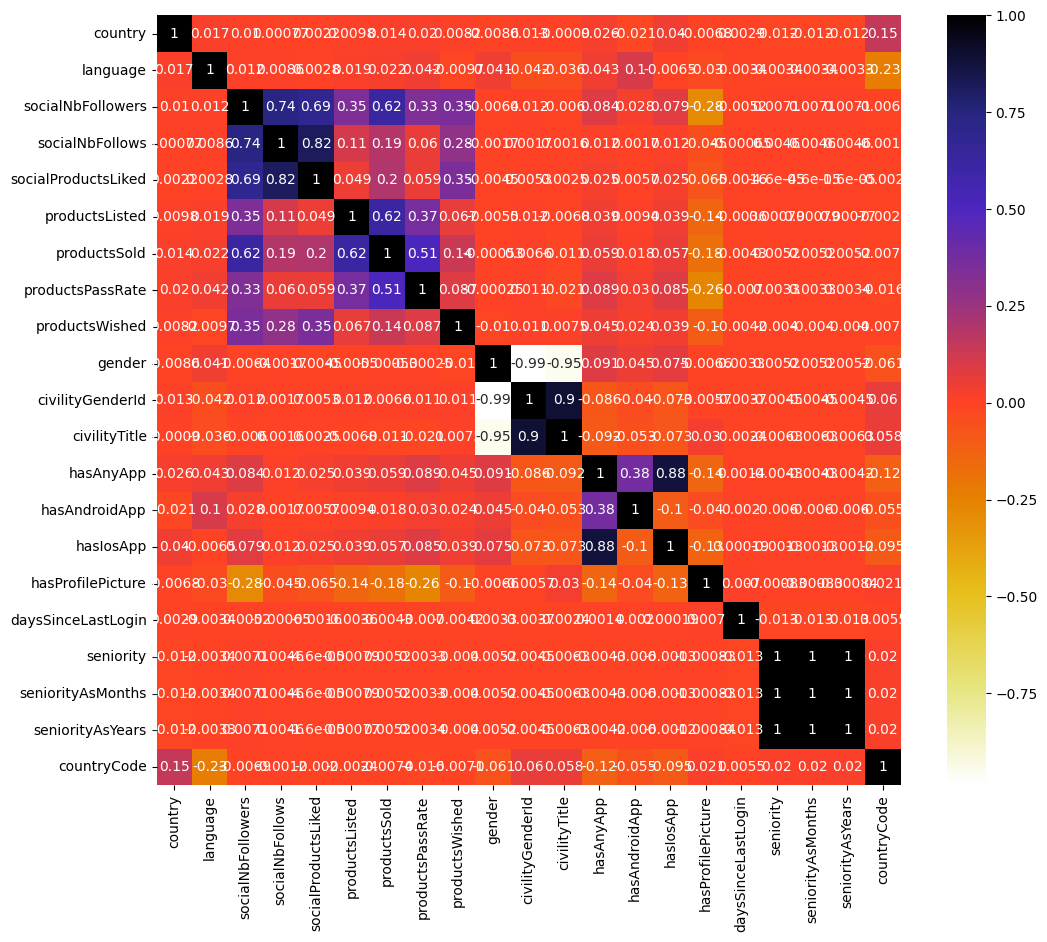

In [40]:
import seaborn as sns
#Using Pearson Correlation
plt.figure(figsize=(12,10))
cor = X_train.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.CMRmap_r)
plt.show()

In [41]:
# with the following function we can select highly correlated features
# it will remove the first feature that is correlated with anything other feature

def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [42]:
corr_features = correlation(X_train, 0.9)
len(set(corr_features))

4

In [43]:
corr_features

{'civilityGenderId', 'civilityTitle', 'seniorityAsMonths', 'seniorityAsYears'}

In [44]:
corr_features1 = correlation(X_test, 0.9)
len(set(corr_features1))

4

In [45]:
corr_features1

{'civilityGenderId', 'civilityTitle', 'seniorityAsMonths', 'seniorityAsYears'}

In [46]:
X_train.drop(corr_features,axis=1,inplace=True)
X_test.drop(corr_features,axis=1,inplace=True)

In [47]:
X_train.shape

(79130, 17)

In [48]:
X_test.shape

(19783, 17)

In [49]:
X_train.describe()

,country,language,socialNbFollowers,socialNbFollows,socialProductsLiked,productsListed,productsSold,productsPassRate,productsWished,gender,hasAnyApp,hasAndroidApp,hasIosApp,hasProfilePicture,daysSinceLastLogin,seniority,countryCode
count,79130.000000,79130.000000,79130.000000,79130.000000,79130.000000,79130.000000,79130.000000,79130.000000,79130.000000,79130.000000,79130.000000,79130.000000,79130.000000,79130.000000,79130.000000,79130.000000,79130.000000
mean,70.852357,1.755567,3.439757,8.500468,4.655200,0.090509,0.122785,0.820203,1.614925,0.231126,0.264173,0.048907,0.217010,0.980917,664.413408,3063.716707,93.798281
std,42.562468,1.154355,4.107675,59.051568,200.705113,1.927294,2.142649,8.529632,26.751254,0.421555,0.440895,0.215675,0.412212,0.136816,7856.416627,168.297966,55.203668
min,0.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,11.000000,2852.000000,0.000000
25%,55.000000,1.000000,3.000000,8.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,570.000000,2857.000000,64.000000
50%,58.000000,1.000000,3.000000,8.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,694.000000,3196.000000,66.000000
75%,87.000000,3.000000,3.000000,8.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,702.000000,3201.000000,152.000000
max,199.000000,4.000000,744.000000,13764.000000,51671.000000,244.000000,174.000000,100.000000,2635.000000,1.000000,1.000000,1.000000,1.000000,1.000000,737028.000000,3205.000000,198.000000


In [50]:
X_train.shape

(79130, 17)

In [51]:
std_scaler = StandardScaler()
X_train = std_scaler.fit_transform(X_train)
X_test = std_scaler.transform(X_test)

In [52]:
def percentage_error(actual, predicted):
    res = np.empty(actual.shape)
    for j in range(actual.shape[0]):
        if actual[j] != 0:
            res[j] = (actual[j] - predicted[j]) / actual[j]
        else:
            res[j] = predicted[j] / np.mean(actual)
    return res

def mean_absolute_percentage_error(y_true, y_pred): 
    return np.mean(np.abs(percentage_error(np.asarray(y_true), np.asarray(y_pred)))) * 100

In [53]:
def smape(a, f):
    return 1/len(a) * np.sum(2 * np.abs(f-a) / (np.abs(a) + np.abs(f))*100)

In [54]:
def compute_r2(y_true, y_predicted):
    sse = sum((y_true - y_predicted)**2)
    tse = (len(y_true) - 1) * np.var(y_true, ddof=1)
    r2_score1 = 1 - (sse / tse)
    return r2_score1, sse, tse

In [55]:
def Performance_Evaluation():
    clf = RandomForestRegressor(n_estimators=13, random_state=3, max_depth=18,
                                        min_weight_fraction_leaf=0.0002)
    clf.fit(X_train,np.log1p(y_train))
    y_pred_ts = clf.predict(X_test)
    y_pred_tr = clf.predict(X_train)
    print("Predicted values:")
    print(y_pred_ts)
    return y_pred_ts,clf,y_pred_tr

In [56]:
y_pred_ts,clf,y_pred_tr = Performance_Evaluation()

Predicted values:
[0.00737141 0.12376762 0.00314928 ... 0.01417379 0.00317638 0.00237559]


In [57]:
def my_r2_score(y_true, y_hat):
    y_bar = np.mean(y_true)
    ss_total = np.sum((y_true - y_bar) ** 2)
    ss_explained = np.sum((y_hat - y_bar) ** 2)
    ss_residual = np.sum((y_true - y_hat) ** 2)
    scikit_r2 = r2_score(y_true, y_hat)

In [58]:
#Printing the performance parameters' values -> MAE, MSE, RMSE, RMSLE, R2
print("Training before tuning\n")
print ('MAE:', mean_absolute_error(np.log1p(y_train), y_pred_tr))
print ('MSE:', mean_squared_error(np.log1p(y_train), y_pred_tr))
print ('RMSE:', np.sqrt(mean_squared_error(np.log1p(y_train), y_pred_tr)))
print ('RMSLE:', np.log(np.sqrt(mean_squared_error(np.log1p(y_train), y_pred_tr))))
print ('R2:', r2_score(np.log1p(y_train), y_pred_tr))
print('MAPE:',mean_absolute_percentage_error(np.log1p(y_train), y_pred_tr))
print('Smape:',smape(np.log1p(y_train), y_pred_tr))
print("Test before tuning\n")
print ('MAE:', mean_absolute_error(np.log1p(y_test), y_pred_ts))
print ('MSE:', mean_squared_error(np.log1p(y_test), y_pred_ts))
print ('RMSE:', np.sqrt(mean_squared_error(np.log1p(y_test), y_pred_ts)))
print ('RMSLE:', np.log(np.sqrt(mean_squared_error(np.log1p(y_test), y_pred_ts))))
print ('R2:', r2_score(np.log1p(y_test), y_pred_ts))
adj_r2 = 1 - (1-r2_score(np.log1p(y_test), y_pred_ts)) * (len(np.log1p(y_test))-1)/(len(np.log1p(y_test))-X_test.shape[1]-1)
print(adj_r2)
print('MAPE:',mean_absolute_percentage_error(np.log1p(y_test), y_pred_ts))
print('Smape:',smape(np.log1p(y_test), y_pred_ts))

Training before tuning

MAE: 0.062404642663861504
MSE: 0.03629866676214995
RMSE: 0.19052208995848735
RMSLE: -1.6579871333506309
R2: 0.5425932832407305
MAPE: 55.61049363796972
Smape: 178.35476656019605
Test before tuning

MAE: 0.07240179907669671
MSE: 0.04910153862923114
RMSE: 0.22158866990266254
RMSLE: -1.5069324540142128
R2: 0.40820520903251123
0.4076962026350184
MAPE: 57.271123912364516
Smape: 179.23854957053038


In [59]:
dt_param = dict(n_estimators = [5, 10, 50, 100, 250, 500],
                max_depth = [1, 5, 10, 50,100],
                min_samples_split = [5, 10, 100, 500],
                max_features = ['auto', 'sqrt','log2'],
                 min_samples_leaf= [1,5, 10, 50,100])

In [60]:
from sklearn.model_selection import RandomizedSearchCV

#RandomizedSearchCV 
""""rf_random = RandomizedSearchCV(estimator=clf,
                      param_distributions=dt_param1,
                      n_jobs=-1,
                      cv=3,
                      verbose=2,
                      return_train_score=True)"""
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = dt_param, n_iter = 20, cv = 5, verbose=10, n_jobs = -1)

In [61]:
#Fitting the values with RandomizedSearchCV
rf_random.fit(X_train,np.log1p(y_train))

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV 1/5; 1/20] START max_depth=50, max_features=sqrt, min_samples_leaf=10, min_samples_split=100, n_estimators=5
[CV 1/5; 1/20] END max_depth=50, max_features=sqrt, min_samples_leaf=10, min_samples_split=100, n_estimators=5;, score=0.380 total time=   0.2s
[CV 2/5; 1/20] START max_depth=50, max_features=sqrt, min_samples_leaf=10, min_samples_split=100, n_estimators=5
[CV 2/5; 1/20] END max_depth=50, max_features=sqrt, min_samples_leaf=10, min_samples_split=100, n_estimators=5;, score=0.379 total time=   0.2s
[CV 3/5; 1/20] START max_depth=50, max_features=sqrt, min_samples_leaf=10, min_samples_split=100, n_estimators=5
[CV 3/5; 1/20] END max_depth=50, max_features=sqrt, min_samples_leaf=10, min_samples_split=100, n_estimators=5;, score=0.354 total time=   0.2s
[CV 4/5; 1/20] START max_depth=50, max_features=sqrt, min_samples_leaf=10, min_samples_split=100, n_estimators=5
[CV 4/5; 1/20] END max_depth=50, max_features=sqrt, mi

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_iter=20,
                   n_jobs=-1,
                   param_distributions={'max_depth': [1, 5, 10, 50, 100],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 5, 10, 50, 100],
                                        'min_samples_split': [5, 10, 100, 500],
                                        'n_estimators': [5, 10, 50, 100, 250,
                                                         500]},
                   verbose=10)

In [62]:
#Priting the best params' values
print(rf_random.best_params_)

{'n_estimators': 250, 'min_samples_split': 5, 'min_samples_leaf': 10, 'max_features': 'sqrt', 'max_depth': 100}


In [63]:
y_pred1 = rf_random.predict(X_test)
y_pred2 = rf_random.predict(X_train)
print("Predicted values:")
print(y_pred1)

Predicted values:
[0.00671124 0.14538413 0.00173362 ... 0.0317319  0.00232948 0.00423202]


In [64]:
print("Training after tuning\n")
print ('MAE:', mean_absolute_error(np.log1p(y_train), y_pred2))
print ('MSE:', mean_squared_error(np.log1p(y_train), y_pred2))
print ('RMSE:', np.sqrt(mean_squared_error(np.log1p(y_train), y_pred2)))
print ('RMSLE:', np.log(np.sqrt(mean_squared_error(np.log1p(y_train), y_pred2))))
print ('R2:', r2_score(np.log1p(y_train), y_pred2))
adj_r2 = 1 - (1-r2_score(np.log1p(y_train), y_pred2)) * (len(np.log1p(y_train))-1)/(len(np.log1p(y_train))-X_train.shape[1]-1)
print(adj_r2)
print('MAPE:',mean_absolute_percentage_error(np.log1p(y_train), y_pred2))
print('Smape:',smape(np.log1p(y_train), y_pred2))
print("Test after tuning\n")
print ('MAE:', mean_absolute_error(np.log1p(y_test), y_pred1))
print ('MSE:', mean_squared_error(np.log1p(y_test), y_pred1))
print ('RMSE:', np.sqrt(mean_squared_error(np.log1p(y_test), y_pred1)))
print ('RMSLE:', np.log(np.sqrt(mean_squared_error(np.log1p(y_test), y_pred1))))
print ('R2:', r2_score(np.log1p(y_test), y_pred1))
adj_r2 = 1 - (1-r2_score(np.log1p(y_test), y_pred1)) * (len(np.log1p(y_test))-1)/(len(np.log1p(y_test))-X_test.shape[1]-1)
print(adj_r2)
print('MAPE:',mean_absolute_percentage_error(np.log1p(y_test), y_pred1))
print('Smape:',smape(np.log1p(y_test), y_pred1))

Training after tuning

MAE: 0.06688595214913276
MSE: 0.039389947708150436
RMSE: 0.19846900944014015
RMSLE: -1.6171223147707234
R2: 0.5036394374326808
0.5035327768810117
MAPE: 60.09188322218254
Smape: 194.61436262908174
Test after tuning

MAE: 0.07344544257878392
MSE: 0.04843349527456109
RMSE: 0.22007611245785194
RMSLE: -1.513781826744606
R2: 0.4162567811109231
0.41575469992088454
MAPE: 58.44271134915615
Smape: 194.94161319364792
